<a href="https://colab.research.google.com/github/ananya-ayasi/2022_IBM_Code_Challenge_Wildfire-Detection-and-Burn-Severity-Analysis/blob/main/02_Live_Fire_detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook covers the usage of the classifier model for wildfire detection by accessing the image via a webcam.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image

The following cell is the code for accessing the webcam. This is to create a scenario close enough to the real-life application wherein images captured from a UAV will be tesetd.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


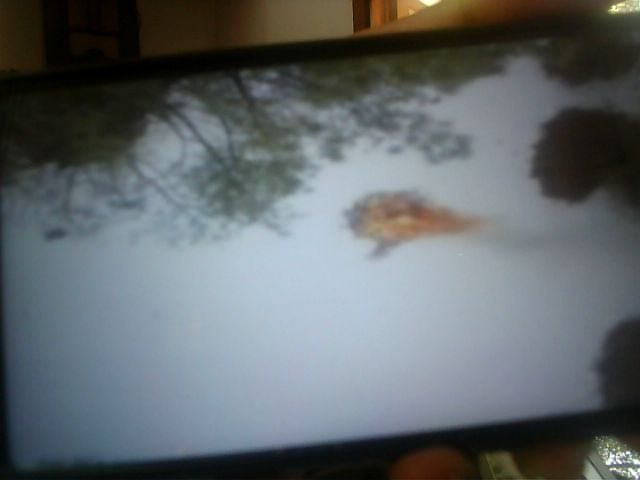

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from keras.models import load_model
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
#returns a compiled model
#identical to the previous one
classifier = load_model('/content/drive/MyDrive/IBM/classifier.h5')


def predict(img_path):
    test_image = image.load_img(img_path, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    #training_set.class_indices
    if result[0][0] == 1:
        prediction = 'notfire'
        return False
    else:
        prediction = 'fire'
        return True


img1 =  True


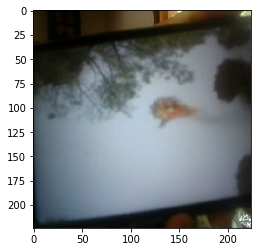

In [ ]:
path = 'photo.jpg'
img1 = predict(path)
print("img1 = ", img1)
img = image.load_img(path, target_size=(224, 224))
plt.imshow(img)


In [ ]:
if img1==True:
  text=" Fire Detected"
else:
  text= "Fire Not Detected"
print('\033[1m' + text + '\033[0m')

 Fire Detected
